# **画像認識デモ**


### 画像をダウンロードして、識別する。

- [ボールペン](https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/pen-and-paper.jpg)
- [植物の鉢](https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/flowers-in-ceramic-pot.jpg)
- [シャム猫](https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/cat.jpg)



In [0]:
!rm -f *jpg*
!curl -fsSLO https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/pen-and-paper.jpg
!curl -fsSLO https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/flowers-in-ceramic-pot.jpg
!curl -fsSLO https://raw.githubusercontent.com/IMOKURI/image-depot/master/images/cat.jpg
!ls

cat.jpg  flowers-in-ceramic-pot.jpg  pen-and-paper.jpg	sample_data


### ボールペンを画像認識
- ここではすでにトレーニング済のモデルを使います([ResNet50](https://keras.io/ja/applications/#resnet50))
- 事前にダウンロードした画像ファイルを使って、認識（「**推論**」といいます）させてみましょう
- 結果は確率の高い順に複数出されるので、上位３つに絞って表示します

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Tensorflow version 2.2.0-rc2


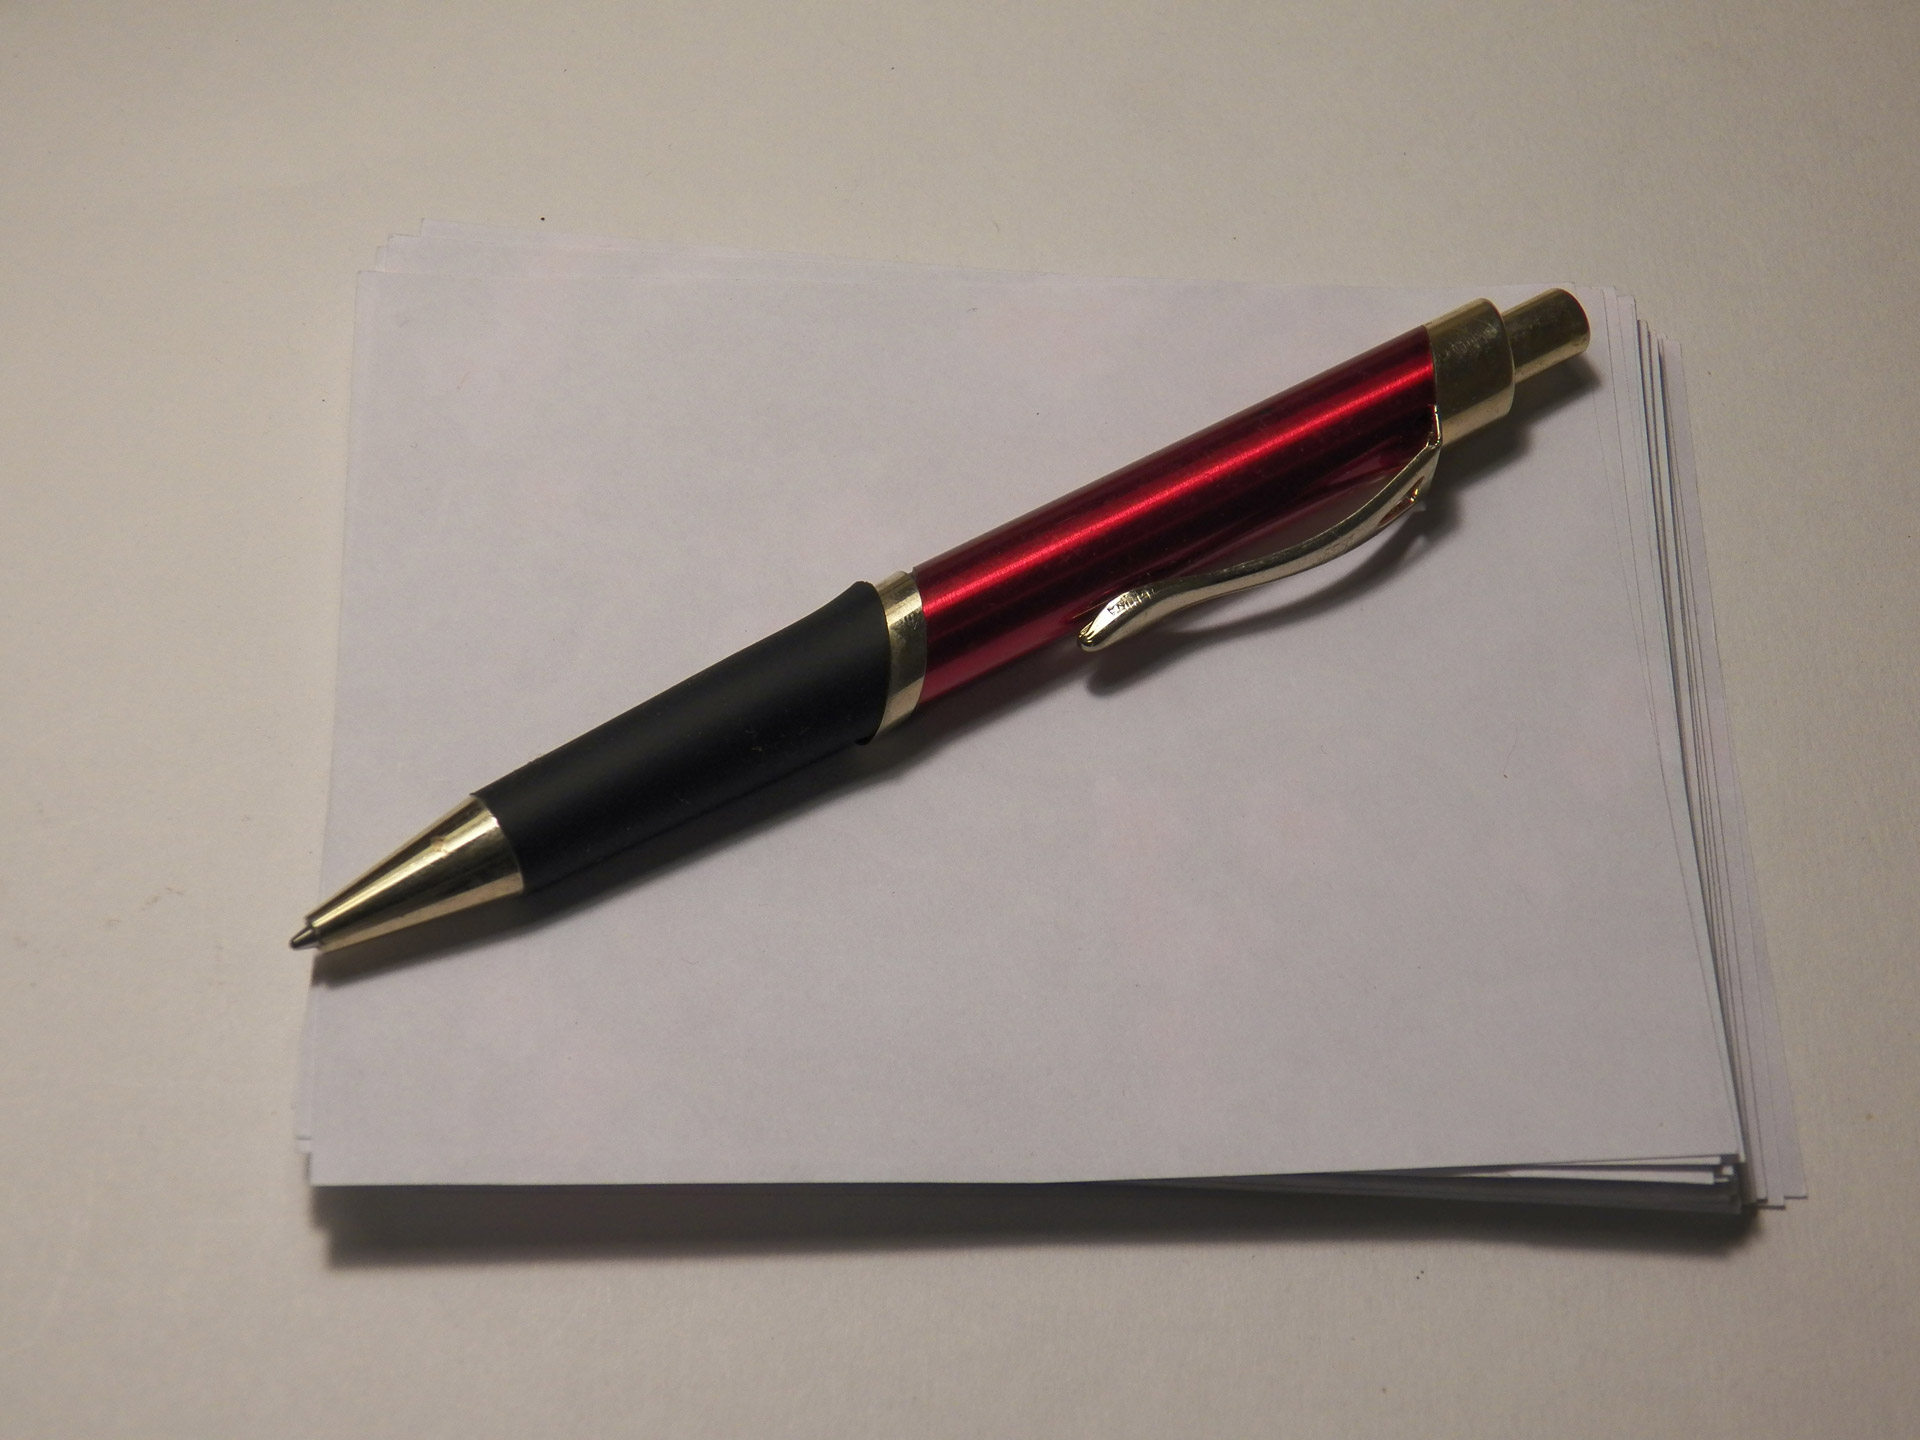

ballpoint: 77%
fountain_pen: 21%
letter_opener: 0%


In [0]:
!pip install -U keras

import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

print("Tensorflow version " + tf.__version__)

# ImageNetで事前学習した重みを利用可能なResNet50モデルを使用します。
# ImageNetはスタンフォード大学がインターネットから集め分類した画像のデータセットです。
model = ResNet50(weights='imagenet')
 
# 画像をロード
img_path = 'pen-and-paper.jpg'
img = image.load_img(img_path, target_size=(224, 224))
 
# モデルに読み込める用に前処理
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
# 推論
preds = model.predict(x)

# 画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image('pen-and-paper.jpg'))

# 結果を表示
for name, description, score in decode_predictions(preds, top=3)[0]:
    print(description + ": " + str(int(score * 100)) + "%")

### 植物の鉢を画像認識
- やり方はボールペンと同じ（ファイル名だけ異なります）

In [0]:
 
# 画像をロード
img_path = 'flowers-in-ceramic-pot.jpg'
img = image.load_img(img_path, target_size=(224, 224))
 
# モデルに読み込める用に前処理
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
# 推論
preds = model.predict(x)

# 画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image('flowers-in-ceramic-pot.jpg'))

# 結果を表示
for name, description, score in decode_predictions(preds, top=3)[0]:
    print(description + ": " + str(int(score * 100)) + "%")

Output hidden; open in https://colab.research.google.com to view.

### （オプション課題）ファイルをアップロードする
- 手持ちの画像ファイルがあれば「ファイル選択」ボタンを押して、アップロードしてみましょう
  - アップロードした画像をこの後認識させてみます

In [0]:
# ファイルをアップロードする
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat (1).jpg


In [0]:
# アップロードしたファイル名を確認する
!ls

'cat (1).jpg'   flowers-in-ceramic-pot.jpg   sample_data
 cat.jpg        pen-and-paper.jpg


### アップロードした画像ファイルを認識させる
- 画像ファイルのファイル名を確認（上の"ls"コマンドでファイル名がわかります）
- ファイル名を下のコードに反映させてください（"###ここを変更###"の行）※２か所あります。

### うまくできない場合
- 画像ファイルが大きすぎると失敗する場合があります
- システムが固まることもまれにあります。その場合、メニュー「ランタイム」→「ランタイムを再起動」とすると環境がリセットされて、成功することがあります
- それでもできない場合もありますので、周りのみなさんの実行状況を見せていただきましょう

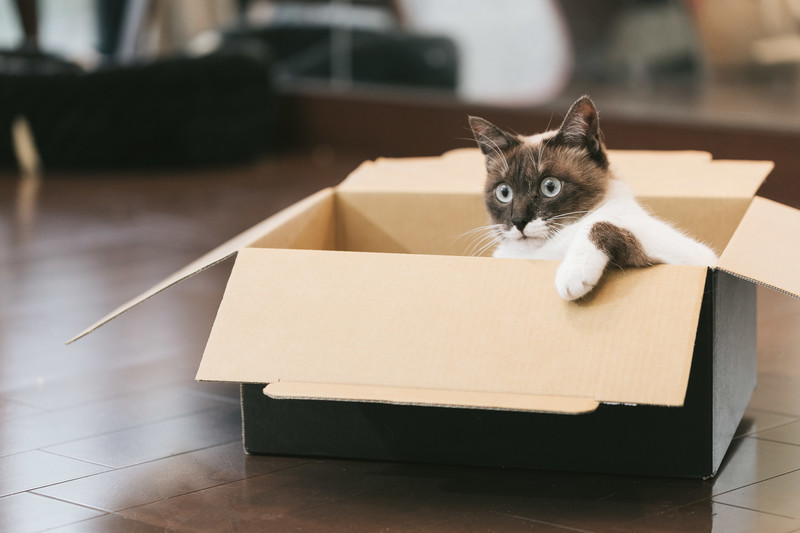

Siamese_cat: 82%
carton: 13%
Egyptian_cat: 0%


In [0]:

# 画像をロード
img_path = 'cat.jpg'  ### ここを変更 ###
img = image.load_img(img_path, target_size=(224, 224))
 
# モデルに読み込める用に前処理
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
# 推論
preds = model.predict(x)

# 画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image('cat.jpg'))  ### ここを変更 ###

# 結果を表示
for name, description, score in decode_predictions(preds, top=3)[0]:
    print(description + ": " + str(int(score * 100)) + "%")